In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img
import warnings

from random import randint
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline


In [17]:
warnings.filterwarnings('ignore')

In [18]:
input_shape=(64,64,3)

In [19]:

model = tf.keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),  activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))



In [21]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [22]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        './chest_xray/train',
        target_size=(64, 64),
        batch_size=64,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        './chest_xray/test',
        target_size=(64, 64),
        batch_size=64,
        class_mode='binary')
model.fit(
        train_generator,
        steps_per_epoch=82,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=82)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/30
82/82 [==============================] - ETA: 0s - loss: 0.5353 - accuracy: 0.7596WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 82 batches). You may need to use the repeat() function when building your dataset.


82/82 [==============================] - 99s 1s/step - loss: 0.5353 - accuracy: 0.7596 - val_loss: 1.3061 - val_accuracy: 0.6250
Epoch 2/30
82/82 [==============================] - 86s 1s/step - loss: 0.3227 - accuracy: 0.8623
Epoch 3/30
82/82 [==============================] - 91s 1s/step - loss: 0.2488 - accuracy: 0.8990
Epoch 4/30
82/82 [==============================] - 92s 1s/step - loss: 0.2276 - accuracy: 0.9072
Epoch 5/30
82/82 [==============================] - 98s 1s/step - loss: 0.2007 - accuracy: 0.9224
Epoch 6/30
82/82 [==============================] - 88s 1s/step - loss: 0.1949 - accuracy: 0.9271
Epoch 7/30
82/82 [==============================] - 91s 1s/step - loss: 0.1775 - accuracy: 0.9340
Epoch 8/30
82/82 [==============================] - 90s 1s/step - loss: 0.1639 - accuracy: 0.9365
Epoch 9/30
82/82 [==============================] - 92s 1s/step - loss: 0.1532 - accuracy: 0.9404
Epoch 10/30
82/82 [==============================] - 89s 1s/step - loss: 0.1555 - accur

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_13 (ModuleWra (None, None, None, 32)    896       
_________________________________________________________________
module_wrapper_14 (ModuleWra (None, None, None, 32)    0         
_________________________________________________________________
module_wrapper_15 (ModuleWra (None, None, None, 32)    9248      
_________________________________________________________________
module_wrapper_16 (ModuleWra (None, None, None, 32)    0         
_________________________________________________________________
module_wrapper_17 (ModuleWra (None, None, None, 64)    18496     
_________________________________________________________________
module_wrapper_18 (ModuleWra (None, None, None, 64)    0         
_________________________________________________________________
module_wrapper_19 (ModuleWra (None, None, None, 64)   

In [24]:
scores = model.evaluate(validation_generator)

print("Loss of the model: %.2f"%(scores[0]))
print("Test Accuracy: %.2f%%"%(scores[1] * 100))

10/10 [==============================] - 7s 651ms/step - loss: 0.2921 - accuracy: 0.9215
Loss of the model: 0.29
Test Accuracy: 92.15%


In [25]:
# Saving the model for future use
model.save('custom_model.h5py')

INFO:tensorflow:Assets written to: custom_model.h5py\assets


INFO:tensorflow:Assets written to: custom_model.h5py\assets


[[0.9097419]]
This image is 90.97 percent PNEUMONIA


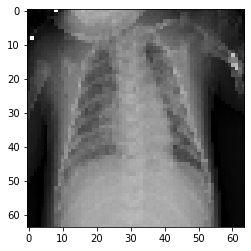

In [26]:
def predict_image(filename):
    img = load_img(filename, target_size=(64, 64))
    image = keras.preprocessing.image.img_to_array(img)
    image = image / 255.0
    image = image.reshape(1,64,64,3)
    model = tf.keras.models.load_model('custom_model.h5py')
    prediction = model.predict(image)
    print(prediction)
    plt.imshow(img)
    if(prediction[0] > 0.5):
        stat = prediction[0] * 100 
        print("This image is %.2f percent %s"% (stat, "PNEUMONIA"))
    else:
        stat = (1.0 - prediction[0]) * 100
        print("This image is %.2f percent %s" % (stat, "NORMAL"))

   
predict_image("./chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg")
